In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("games.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1.	Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [8]:
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [10]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [16]:
data = data.dropna()
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [20]:
data.shape

(16291, 11)

2.	Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [202]:
data.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [204]:
data.Year.mode()

0    2009.0
Name: Year, dtype: float64

In [48]:
data_years = data.groupby('Year', as_index = False).Year.value_counts()
data_years.head()

,Year,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


<Axes: xlabel='Year', ylabel='count'>

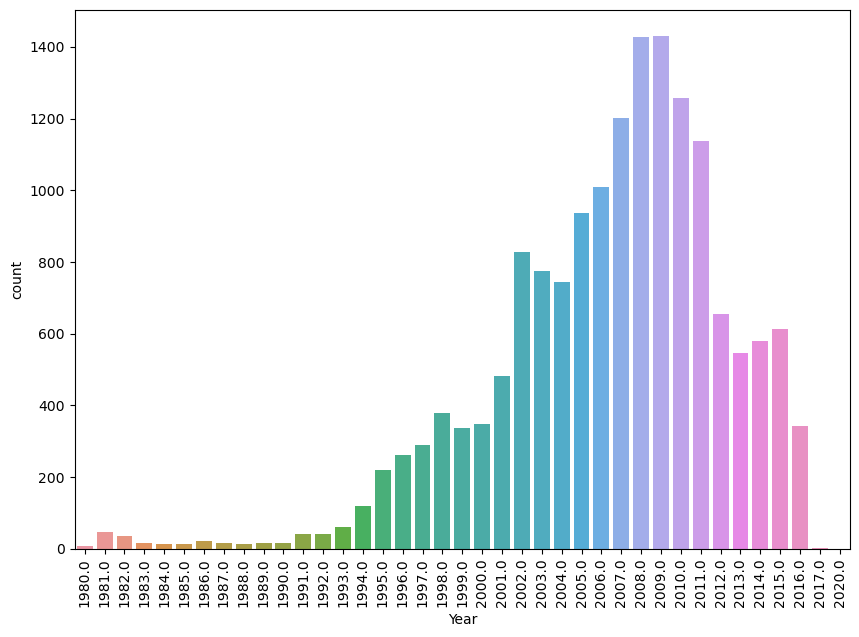

In [108]:
fig, ax = plt.subplots(figsize = (10,7))
ax.tick_params(axis = 'x', rotation = 90, labelsize = 10)
sns.barplot(x = data_years['Year'], y = data_years['count'])

3.	На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [119]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [207]:
data.Platform.value_counts().sort_values(ascending = False).head()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: count, dtype: int64

In [213]:
# Частота встречаемости рассчитывается через normalize = true
frequency_platform = data.Platform.value_counts(normalize = True) * 100
frequency_platform.head()

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
Name: proportion, dtype: float64

In [221]:
frequency_platform[frequency_platform > 7]

Platform
DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
PSP      7.347615
PS       7.298508
Name: proportion, dtype: float64

4.	Игры каких издателей (Publisher) встречаются в датасете чаще всего?

В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [131]:
data.Publisher.value_counts().sort_values(ascending = False).head()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: count, dtype: int64

In [230]:
# Подсчитываем наибольшую частоту встречаемости
data.Publisher.value_counts(normalize = True).sort_values(ascending = False).head(1)

Publisher
Electronic Arts    0.082193
Name: proportion, dtype: float64

In [232]:
# Еще один способ найти самое часто встречающееся значение
data.Publisher.mode()

0    Electronic Arts
Name: Publisher, dtype: object

In [236]:
# Еще один способ найти самое часто встречающееся значение
data.Publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

5.	Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).
В каком регионе медианное значение объема продаж является наибольшим?

In [243]:
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] .describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426
std,0.822432,0.509303,0.311879,0.190083
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.040000
max,41.490000,29.020000,10.220000,10.570000


In [239]:
# Здесь наибольшее
data.NA_Sales.median()

0.08

In [140]:
data.EU_Sales.median()

0.02

In [146]:
data.JP_Sales.median()

0.0

In [148]:
data.Other_Sales.median()

0.01

6.	Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

In [169]:
data_nintendo = data[(data.Publisher == "Nintendo") & (data.JP_Sales > 0)].groupby('Genre', as_index = False) \
                                                        .Genre \
                                                        .value_counts()
data_nintendo.head()

,Genre,count
0,Action,70
1,Adventure,29
2,Fighting,16
3,Misc,87
4,Platform,107


In [177]:
data_nintendo.describe()

,count
count,12.000000
mean,52.083333
std,32.080746
min,16.000000
25%,26.500000
50%,38.500000
75%,74.250000
max,107.000000


In [181]:
# Межквартильный размах
data_nintendo['count'].quantile(0.75) - data_nintendo['count'].quantile(0.25)

47.75

Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где: <br>
по оси x будет расположен жанр игры (Genre) <br>
по оси у – объем продаж в Японии (JP_sales) <br>

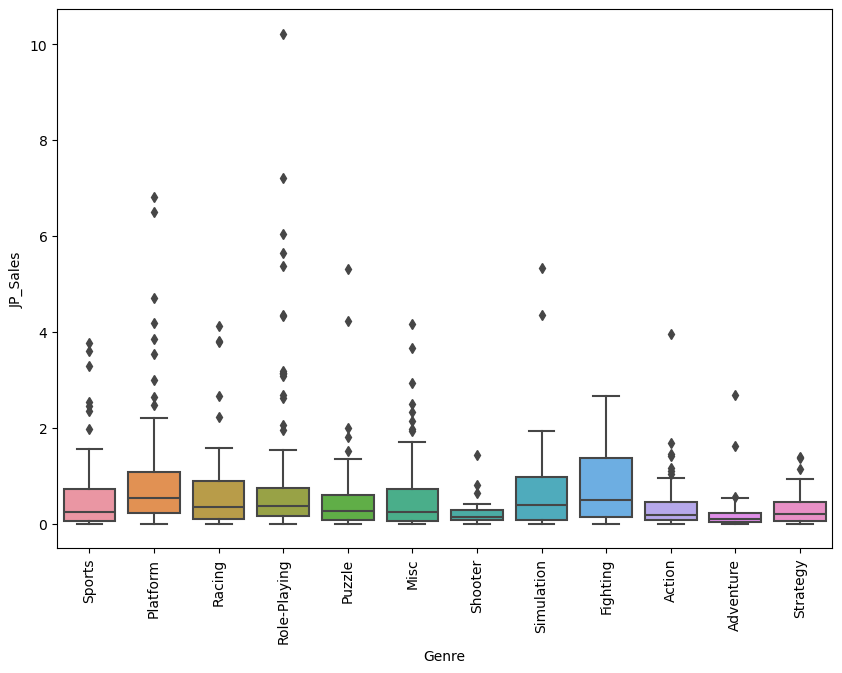

In [280]:
fig, ax = plt.subplots(figsize = (10,7))
sns.boxplot(data = data.query('Publisher == "Nintendo"'), x = 'Genre', y = 'JP_Sales')
ax.tick_params(axis = 'x', rotation = 90, labelsize = 10)

7.	Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [184]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [298]:
genres_years = data[data.Publisher == "Nintendo"] \
     .query('Genre in ["Fighting","Simulation","Platform","Racing","Sports"]') \
     .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()
genres_years.head()

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


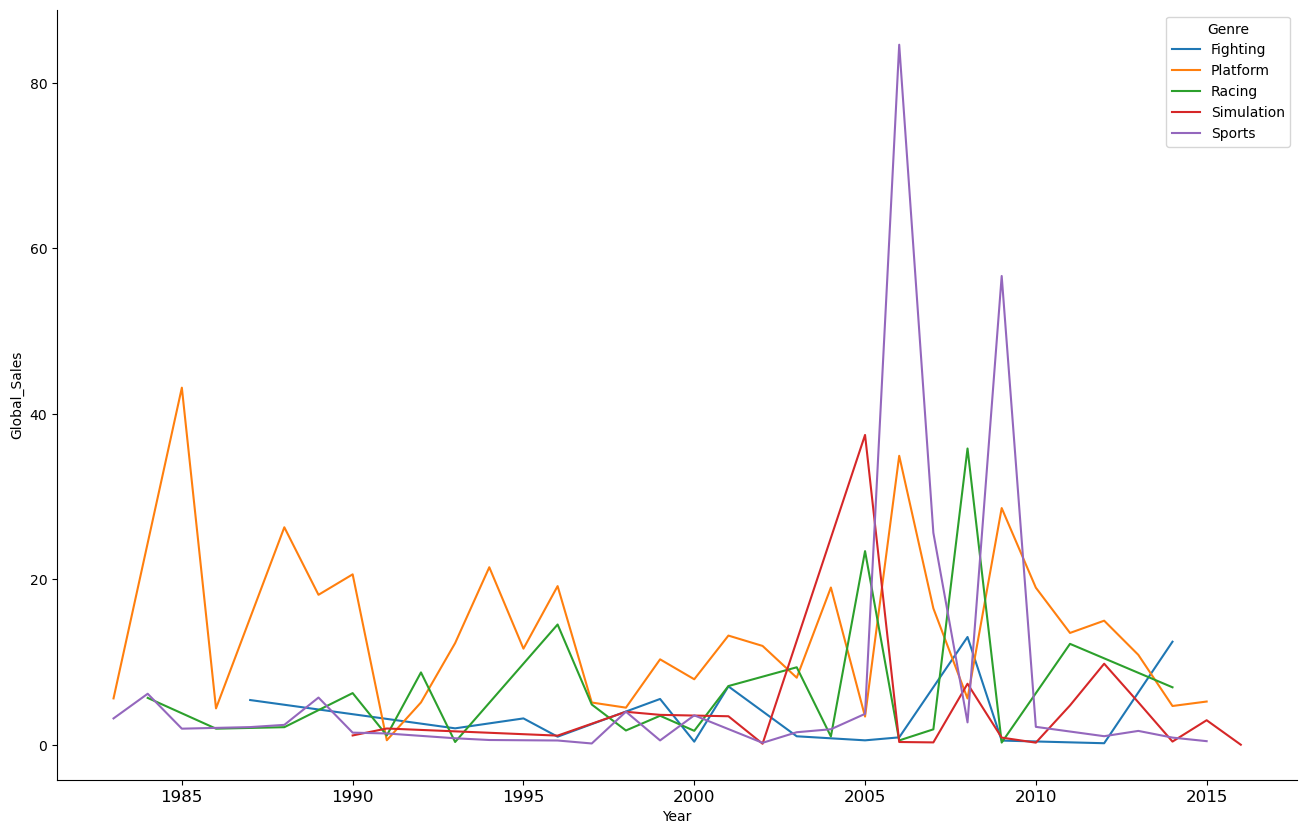

In [318]:
plt.figure(figsize=(16,10))
sns.lineplot(data = genres_years, x = 'Year', y = 'Global_Sales', hue = 'Genre')
plt.xticks(fontsize = 12)
sns.despine()